# Evaluate_walkthrough

## Let's load in our libraries and some data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from statsmodels.formula.api import ols
from math import sqrt
import split_scale
import warnings
warnings.filterwarnings('ignore')

tips = data('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


## Next lets make a dataframe with only total_bill and tip in it so that we can make a model

In [2]:
df = tips[['total_bill', 'tip']]
df

,total_bill,tip
1,16.99,1.01
2,10.34,1.66
3,21.01,3.50
4,23.68,3.31
5,24.59,3.61
...,...,...
240,29.03,5.92
241,27.18,2.00
242,22.67,2.00
243,17.82,1.75


In [3]:
train, test = split_scale.single_split_my_data(df, .7, 42)
train

,total_bill,tip
235,15.53,3.00
228,20.45,3.00
181,34.65,3.68
6,25.29,4.71
57,38.01,3.00
126,29.80,4.20
149,9.78,1.73
115,25.71,4.00
66,20.08,3.15
133,11.17,1.50


## Next we will change the column names to convention

In [4]:
train.columns = ['x', 'y']
train

,x,y
235,15.53,3.00
228,20.45,3.00
181,34.65,3.68
6,25.29,4.71
57,38.01,3.00
126,29.80,4.20
149,9.78,1.73
115,25.71,4.00
66,20.08,3.15
133,11.17,1.50


## Lets add a baseline using the mean

In [5]:
train['yhat_mean_baseline'] = train.y.mean()
train

,x,y,yhat_mean_baseline
235,15.53,3.00,3.088941
228,20.45,3.00,3.088941
181,34.65,3.68,3.088941
6,25.29,4.71,3.088941
57,38.01,3.00,3.088941
126,29.80,4.20,3.088941
149,9.78,1.73,3.088941
115,25.71,4.00,3.088941
66,20.08,3.15,3.088941
133,11.17,1.50,3.088941


## Now let's build a fast and dirty linear regression model

In [6]:
from statsmodels.formula.api import ols

model = ols('y ~ x', data=train).fit()
train['yhat'] = model.predict(train.x)
train

,x,y,yhat_mean_baseline,yhat
235,15.53,3.00,3.088941,2.568077
228,20.45,3.00,3.088941,3.103834
181,34.65,3.68,3.088941,4.650125
6,25.29,4.71,3.088941,3.630880
57,38.01,3.00,3.088941,5.016008
126,29.80,4.20,3.088941,4.121990
149,9.78,1.73,3.088941,1.941938
115,25.71,4.00,3.088941,3.676615
66,20.08,3.15,3.088941,3.063543
133,11.17,1.50,3.088941,2.093300


## Now let's calculate our residuals for both the baseline and model

In [7]:
train['residual_baseline'] = train.yhat_mean_baseline - train.y
train

,x,y,yhat_mean_baseline,yhat,residual_baseline
235,15.53,3.00,3.088941,2.568077,0.088941
228,20.45,3.00,3.088941,3.103834,0.088941
181,34.65,3.68,3.088941,4.650125,-0.591059
6,25.29,4.71,3.088941,3.630880,-1.621059
57,38.01,3.00,3.088941,5.016008,0.088941
126,29.80,4.20,3.088941,4.121990,-1.111059
149,9.78,1.73,3.088941,1.941938,1.358941
115,25.71,4.00,3.088941,3.676615,-0.911059
66,20.08,3.15,3.088941,3.063543,-0.061059
133,11.17,1.50,3.088941,2.093300,1.588941


In [8]:
train['residual'] = train.yhat - train.y
train

,x,y,yhat_mean_baseline,yhat,residual_baseline,residual
235,15.53,3.00,3.088941,2.568077,0.088941,-0.431923
228,20.45,3.00,3.088941,3.103834,0.088941,0.103834
181,34.65,3.68,3.088941,4.650125,-0.591059,0.970125
6,25.29,4.71,3.088941,3.630880,-1.621059,-1.079120
57,38.01,3.00,3.088941,5.016008,0.088941,2.016008
126,29.80,4.20,3.088941,4.121990,-1.111059,-0.078010
149,9.78,1.73,3.088941,1.941938,1.358941,0.211938
115,25.71,4.00,3.088941,3.676615,-0.911059,-0.323385
66,20.08,3.15,3.088941,3.063543,-0.061059,-0.086457
133,11.17,1.50,3.088941,2.093300,1.588941,0.593300


## Let's plot the residuals against x to see how well each did predictor did

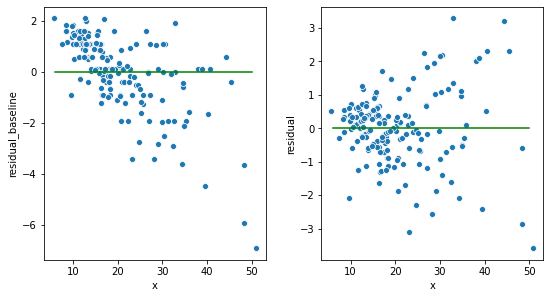

In [9]:
f, axes = plt.subplots(1, 2, figsize=(8, 4.5))

sns.scatterplot(x='x', y='residual_baseline', data=train, ax=axes[0])
sns.lineplot(x=range(round(train.x.min()), round(train.x.max())), y=0, color='green', ax=axes[0])

sns.scatterplot(x='x', y='residual', data=train, ax=axes[1])
sns.lineplot(x=range(round(train.x.min()), round(train.x.max())), y=0, color='green', ax=axes[1])

f.tight_layout(pad=2)

## Now lets calculate some evaluation stats of our models

In [10]:
from sklearn.metrics import mean_squared_error

SSE_baseline = mean_squared_error(train.y, train.yhat_mean_baseline)*len(train)
SSE_yhat = mean_squared_error(train.y, train.yhat)*len(train)
print("baseline SSE: ", SSE_baseline)
print("yhat SSE: ", SSE_yhat)

baseline SSE:  363.0590094117647
yhat SSE:  197.66533285047757


In [11]:
ESS_baseline = sum((train.yhat_mean_baseline - train.y.mean())**2)
ESS_yhat = sum((train.yhat - train.y.mean())**2)
print("baseline ESS: ", ESS_baseline)
print("yhat ESS: ", ESS_yhat)

baseline ESS:  0.0
yhat ESS:  165.39367656128715


In [12]:
TSS_baseline = ESS_baseline + SSE_baseline
TSS_yhat = ESS_yhat + SSE_yhat
print("baseline TSS: ", TSS_baseline)
print("yhat TSS: ", TSS_yhat)

baseline TSS:  363.0590094117647
yhat TSS:  363.0590094117647


In [13]:
MSE_baseline = mean_squared_error(train.y, train.yhat_mean_baseline)
MSE_yhat = mean_squared_error(train.y, train.yhat)
print("baseline MSE: ", MSE_baseline)
print("yhat MSE: ", MSE_yhat)

baseline MSE:  2.13564123183391
yhat MSE:  1.1627372520616328


In [14]:
RMSE_baseline = sqrt(MSE_baseline)
RMSE_yhat = sqrt(MSE_yhat)
print("baseline RMSE: ", RMSE_baseline)
print("yhat RMSE: ", RMSE_yhat)

baseline RMSE:  1.4613833281633912
yhat RMSE:  1.078302950038454


In [15]:
SSE_yhat < SSE_baseline

True

In [16]:
model.rsquared

0.4555559076450443

In [17]:
model.f_pvalue

5.976442030753118e-24

## Lets make some functions that do this for us

### First lets start with a function that creates those residual graphs

In [18]:
def plot_residuals(x, y, yhat, df, baseline=False):
    '''
    x: string; name of feature column
    y: string; name of target column
    yhat: string; name of prediction column
    df: DataFrame; dataframe that includes previously declared columns
    baseline: optional string; name of baseline column
    '''
    df['residuals'] = df[yhat] - df[y]
    
    if baseline:
        df['baseline_residuals'] = df[baseline] - df[y]
        
        f, axes = plt.subplots(1, 2, figsize=(8, 4.5))

        sns.scatterplot(x=x, y='baseline_residuals', data=df, ax=axes[0])
        sns.lineplot(x=range(round(df[x].min()), round(df[x].max())), y=0, color='green', ax=axes[0])

        sns.scatterplot(x=x, y='residuals', data=train, ax=axes[1])
        sns.lineplot(x=range(round(df[x].min()), round(df[x].max())), y=0, color='green', ax=axes[1])

        f.tight_layout(pad=2)
    
    else:
        sns.scatterplot(x=x, y='residuals', data=train)
        sns.lineplot(x=range(round(df[x].min()), round(df[x].max())), y=0, color='green')

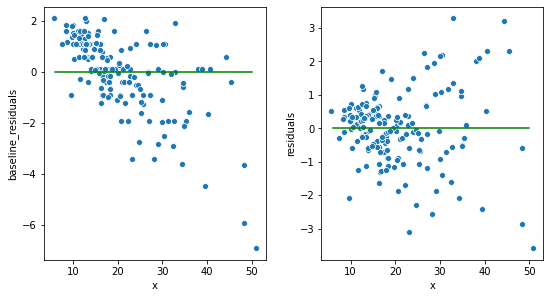

In [19]:
plot_residuals('x', 'y', 'yhat', train, 'yhat_mean_baseline')

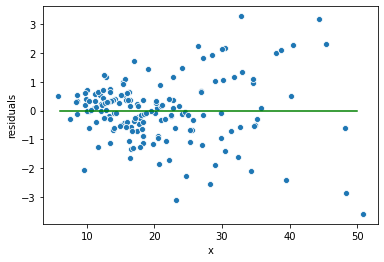

In [20]:
plot_residuals('x', 'y', 'yhat', train)

### Next lets make one that gives us back our evaluation stats

In [21]:
error_df = pd.DataFrame(np.array(['SSE', 'ESS', 'TSS', 'MSE', 'RMSE']), columns=['metric'])
error_df

,metric
0,SSE
1,ESS
2,TSS
3,MSE
4,RMSE
